# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
ValueNumeric = fifa.Value.str.strip('€').str.strip('M').str.strip('K').astype(float)
ValueNumeric.head()

0    110.5
1     77.0
2    118.5
3     72.0
4    102.0
Name: Value, dtype: float64

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
fifa = fifa.rename(index=str, columns={"Preferred Foot": "Foot"})
fifa['FootPosition'] = fifa.Foot + "-" + fifa.Position

model = ols('Overall ~ C(FootPosition)', data=fifa).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(FootPosition),59479.753939,53.0,25.13653,1.638797e-234
Residual,807790.153814,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
#Because the P value is significantly less, we are going to reject it, stating that the position impacts the data.


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [7]:
# Your code here:

model = ols('Overall ~ C(Nationality)', data=fifa).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(Nationality),159691.036842,163.0,24.919899,0.0
Residual,709341.575560,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [8]:
# Your code here:

null_cols = fifa.isnull().sum()
null_cols[null_cols > 0]
fifa = fifa.dropna(axis='rows')
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,FootPosition
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,Left-RF
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,Right-ST
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,Right-LW
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,Right-GK
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,Right-RCM


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [9]:
# Your code here:

X = sm.add_constant(fifa[['SprintSpeed', 'Stamina']])
Y = fifa.Overall

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model_sum = model.summary()
print(model_sum)

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     1400.
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:04:05   Log-Likelihood:                -58808.
No. Observations:               17918   AIC:                         1.176e+05
Df Residuals:                   17915   BIC:                         1.176e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.4593      0.231    244.617      

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [10]:
# Your conclusions here:

#Because the R value for variation is small this idicates that the nationality does not impact variation of players values.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [11]:
# Your code here:

X = sm.add_constant(fifa.Potential)
Y = fifa.Overall

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model_sum = model.summary()
print(model_sum)

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 1.389e+04
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        19:04:05   Log-Likelihood:                -54967.
No. Observations:               17918   AIC:                         1.099e+05
Df Residuals:                   17916   BIC:                         1.100e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0751      0.453     28.880      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [12]:
# Your conclusions here:

#The r value is higher here, indicating that the there is some sort of correlation
# The F-TEST confirms this by looking at all of the other data

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

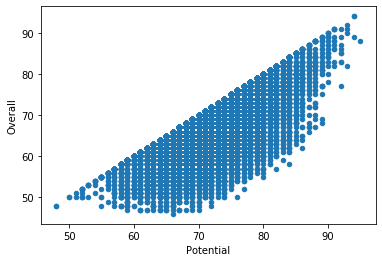

In [13]:
# Your code here:

fifa.plot.scatter(x='Potential', y='Overall')